In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wild-blueberryyield-regression/sample_submission.csv
/kaggle/input/wild-blueberryyield-regression/train.csv
/kaggle/input/wild-blueberryyield-regression/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
df = pd.read_csv("/kaggle/input/wild-blueberryyield-regression/train.csv")

In [4]:
df.head(10)

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,680.0,25.0,0.50,0.38,0.38,0.50,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.523846,0.460180,37.966864,6328.89332
1,1,514.0,25.0,0.50,0.25,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.583380,0.485219,40.813181,7502.24389
2,2,431.0,12.5,0.25,0.38,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.429001,0.408851,31.881847,4587.38557
3,3,656.0,25.0,0.50,0.38,0.38,0.50,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.404225,0.401708,30.798351,4234.86859
4,4,594.0,25.0,0.50,0.25,0.50,0.75,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.509001,0.452027,35.884011,6026.06365
5,5,688.0,25.0,0.50,0.38,0.38,0.75,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.629606,0.521136,44.278583,8090.41713
6,6,342.0,12.5,0.25,0.25,0.75,0.63,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.508992,0.456067,36.810187,6960.10751
7,7,546.0,25.0,0.50,0.25,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.506794,0.450498,35.520534,6347.56076
8,8,238.0,12.5,0.25,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.398218,0.405525,31.109242,4225.96131
9,9,621.0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,1.0,0.10,0.570330,0.436459,36.018624,6801.49205


In [5]:
# Check for missing values
df.isnull().sum()

id                      0
Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [6]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15000 non-null  int64  
 1   Row#                  15000 non-null  float64
 2   clonesize             15000 non-null  float64
 3   honeybee              15000 non-null  float64
 4   bumbles               15000 non-null  float64
 5   andrena               15000 non-null  float64
 6   osmia                 15000 non-null  float64
 7   MaxOfUpperTRange      15000 non-null  float64
 8   MinOfUpperTRange      15000 non-null  float64
 9   AverageOfUpperTRange  15000 non-null  float64
 10  MaxOfLowerTRange      15000 non-null  float64
 11  MinOfLowerTRange      15000 non-null  float64
 12  AverageOfLowerTRange  15000 non-null  float64
 13  RainingDays           15000 non-null  float64
 14  AverageRainingDays    15000 non-null  float64
 15  fruitset           

In [7]:
# Statistical summary
df.describe()

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,428.552400,19.788167,0.392244,0.283986,0.488813,0.589411,82.269053,49.730460,68.735207,59.299213,28.693973,48.626847,18.758352,0.326333,0.500095,0.445593,36.062045,6010.883275
std,4330.271354,212.755628,6.622069,0.448164,0.059063,0.149433,0.146088,9.153763,5.550444,7.647413,6.615709,3.197790,5.397329,11.813316,0.166055,0.076495,0.037777,4.092188,1347.446017
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.163652,0.211830,22.079199,1637.704020
25%,3749.750000,252.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.451911,0.418220,33.239806,5136.932470
50%,7499.500000,468.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.502842,0.445494,35.923314,6097.442850
75%,11249.250000,598.000000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.559325,0.471713,38.934512,7016.893850
max,14999.000000,933.000000,40.000000,18.430000,0.588000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,62.000000,34.000000,0.560000,0.937253,0.937853,46.585105,8969.401840


<Figure size 1200x800 with 0 Axes>

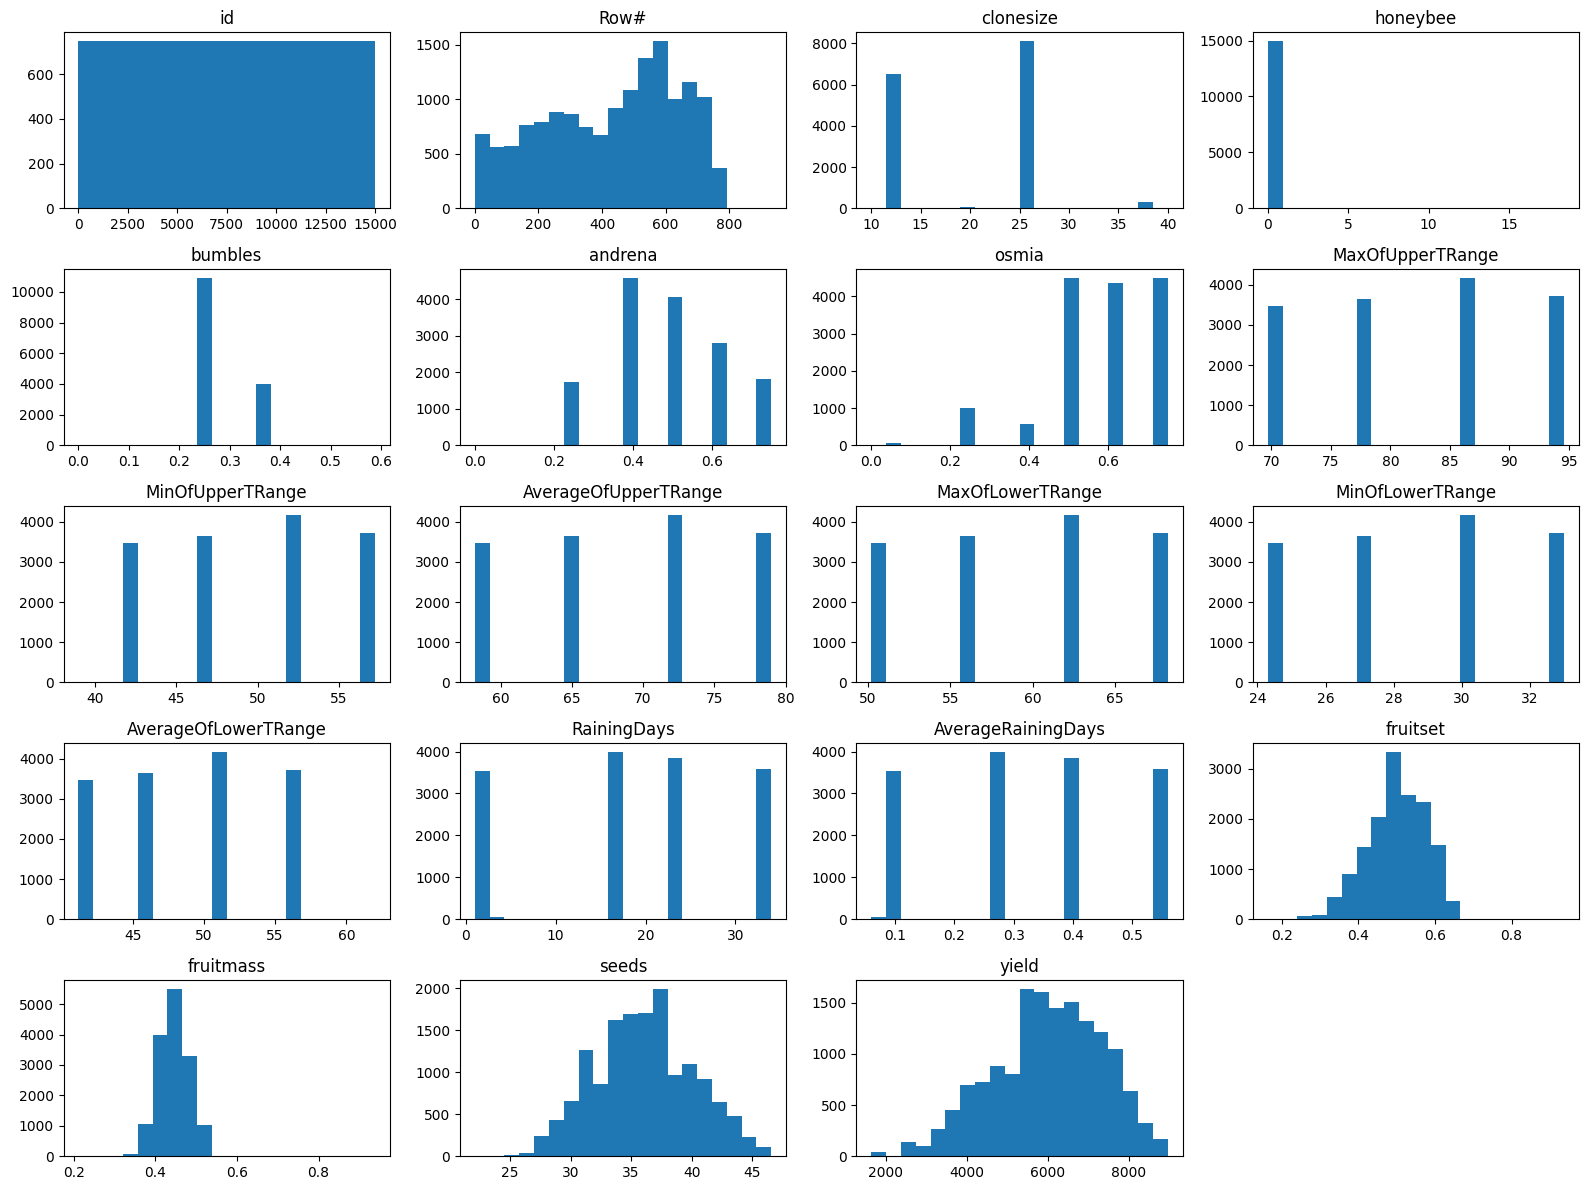

In [8]:
#visualizing the features


plt.figure(figsize=(12, 8))
df.hist(bins=20, figsize=(16, 12), grid=False)
plt.tight_layout()
plt.show()

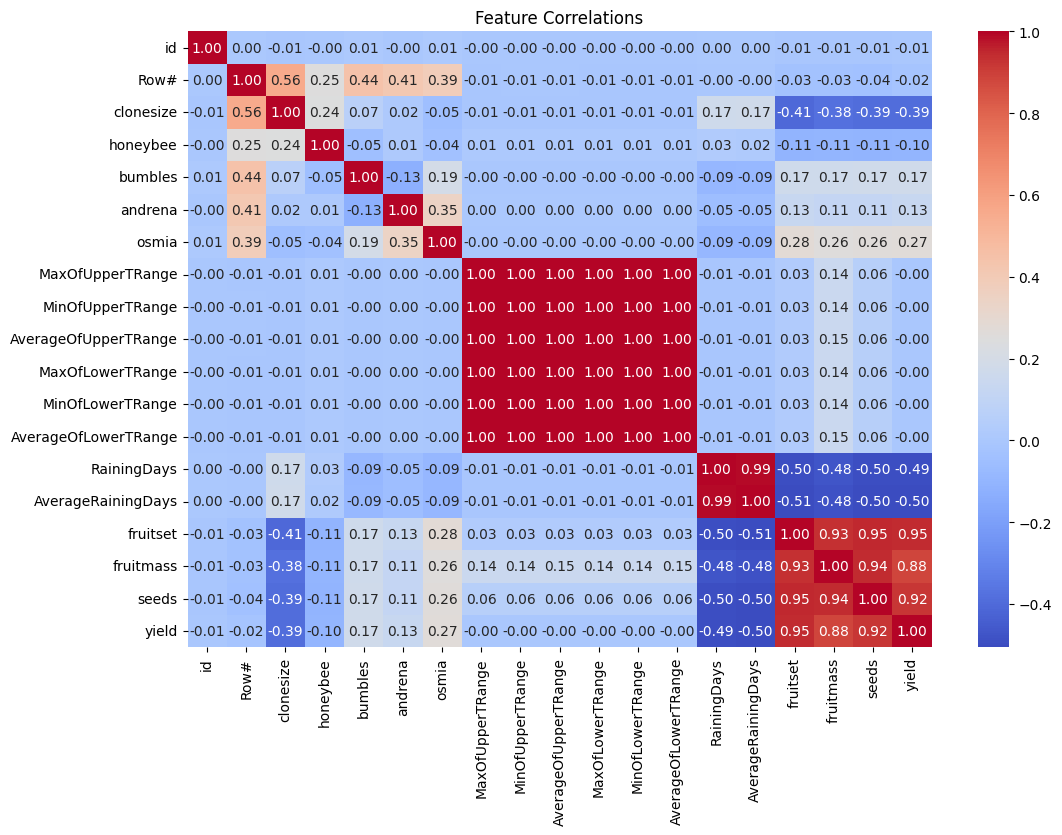

In [9]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlations')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

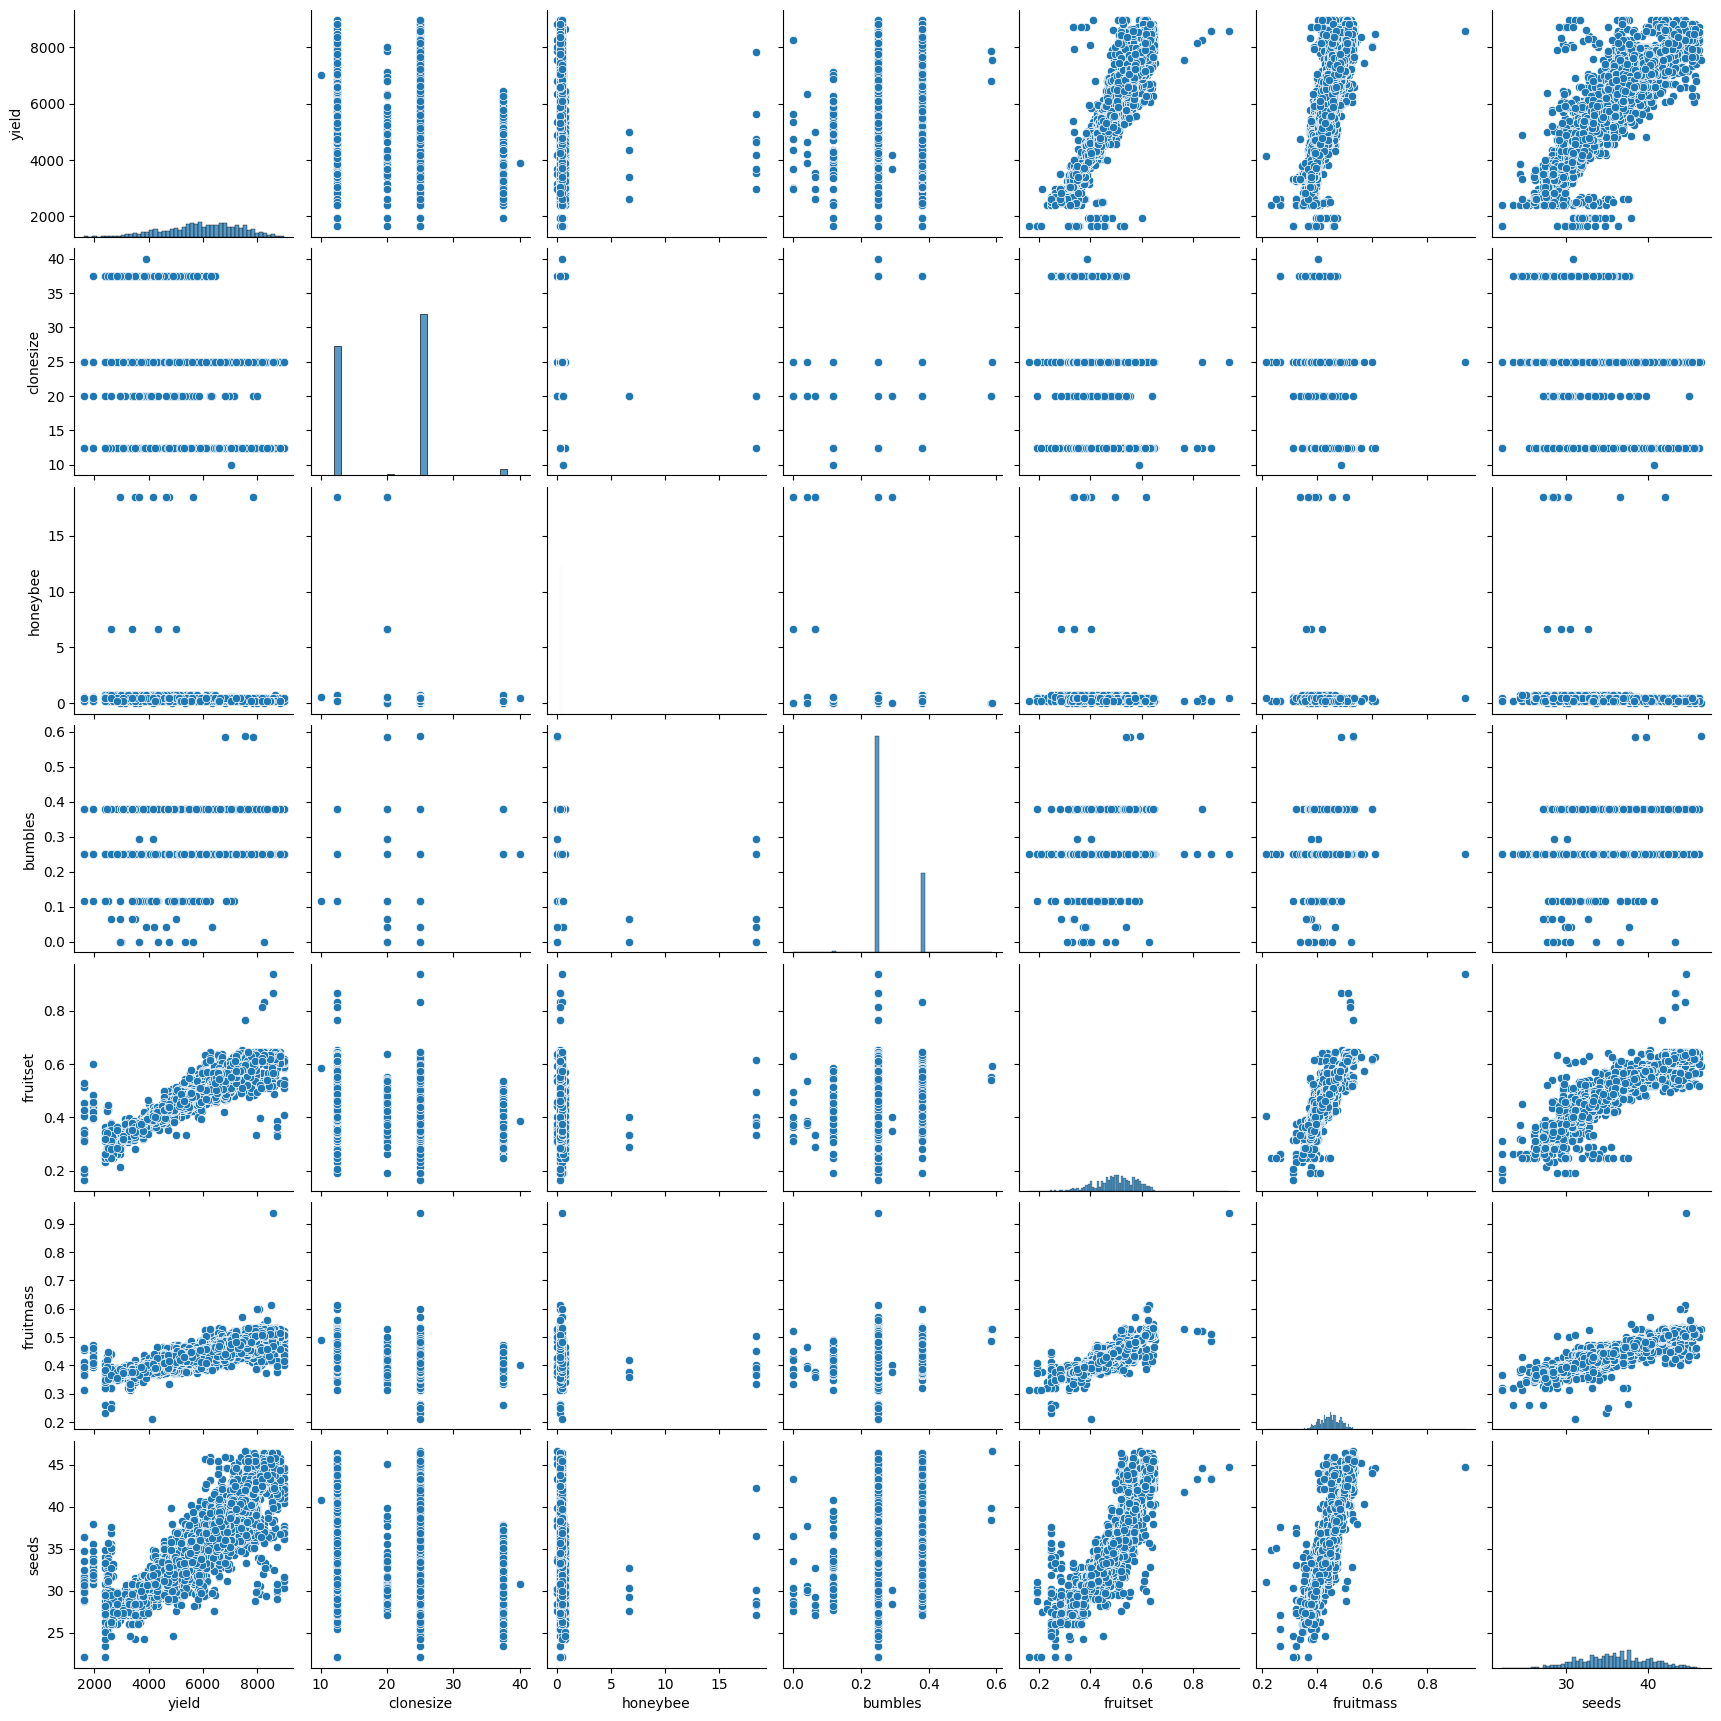

In [10]:
# Pairplot to visualize relationships between key features and the target (Yield)
sns.pairplot(df[['yield', 'clonesize', 'honeybee', 'bumbles', 'fruitset', 'fruitmass', 'seeds']])
plt.show()

In [11]:
yield_correlations = correlation_matrix['yield'].sort_values(ascending=False)

# Print the correlations with 'yield'
print("Correlations with 'yield':")
print(yield_correlations)

Correlations with 'yield':
yield                   1.000000
fruitset                0.946233
seeds                   0.920393
fruitmass               0.884357
osmia                   0.270417
bumbles                 0.170650
andrena                 0.131270
AverageOfUpperTRange   -0.003929
MinOfUpperTRange       -0.004194
AverageOfLowerTRange   -0.004217
MinOfLowerTRange       -0.004273
MaxOfLowerTRange       -0.004303
MaxOfUpperTRange       -0.004486
id                     -0.005473
Row#                   -0.022522
honeybee               -0.100960
clonesize              -0.393196
RainingDays            -0.494318
AverageRainingDays     -0.504169
Name: yield, dtype: float64


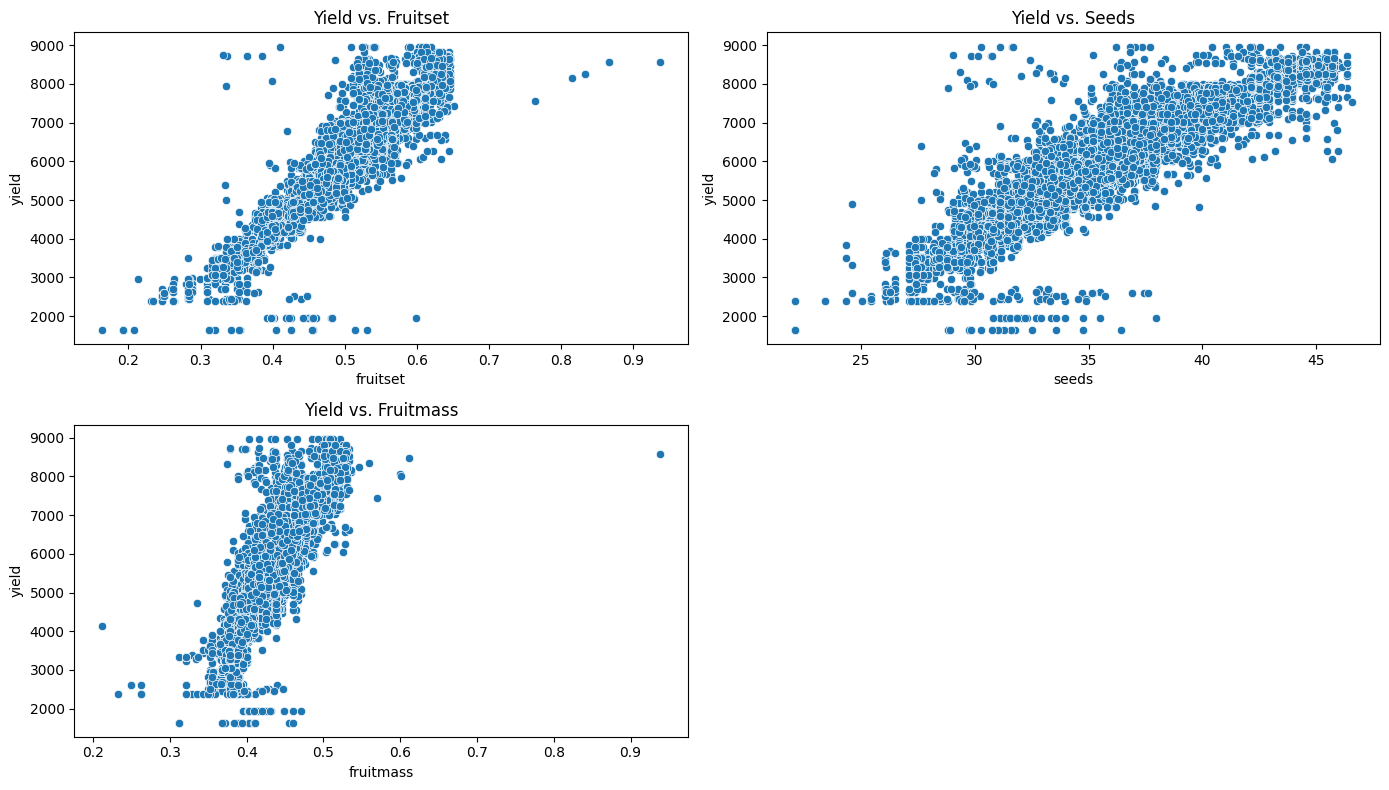

In [12]:
# Visualizing the relationship between yield and the strongest predictors
plt.figure(figsize=(14, 8))

# Fruitset
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='fruitset', y='yield')
plt.title('Yield vs. Fruitset')

# Seeds
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='seeds', y='yield')
plt.title('Yield vs. Seeds')

# Fruitmass
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='fruitmass', y='yield')
plt.title('Yield vs. Fruitmass')

plt.tight_layout()
plt.show()


In [13]:
# Model1 
# Linear Regression
train_df = df
test_df = pd.read_csv("/kaggle/input/wild-blueberryyield-regression/test.csv")

In [14]:
# Select features and target variable from the training data
features = train_df[['fruitset', 'seeds', 'fruitmass', 'osmia', 'bumbles', 'RainingDays', 'AverageRainingDays']]
target = train_df['yield']

# Train-test split from the training data (if needed)
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and fit the model (for example, Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Validate the model
y_val_pred = model.predict(X_val)

# Evaluate the model
mae = mean_absolute_error(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)

print(f'Mean Absolute Error (Validation): {mae}')
print(f'Mean Squared Error (Validation): {mse}')

Mean Absolute Error (Validation): 279.6381775419828
Mean Squared Error (Validation): 196707.7966962635


In [15]:
# Prepare the features from the test data
test_features = test_df[['fruitset', 'seeds', 'fruitmass', 'osmia', 'bumbles', 'RainingDays', 'AverageRainingDays']]

# Make predictions on the test dataset
test_predictions = model.predict(test_features)

# Prepare submission
submission = pd.DataFrame({
    'id': test_df['id'],  # Make sure to include the id column if required
    'yield': test_predictions
})

# Save the submission file
submission.to_csv('submission.csv', index=False)
